Dataset loaded successfully.

--- Sample and Target Sizes ---
Data shape (samples, features): (569, 30)
Target shape (samples,): (569,)
Target names: ['malignant' 'benign']

--- Train/Test Set Sizes ---
X_train: (426, 30)
y_train: (426,)
X_test : (143, 30)
y_test : (143,)

GaussianNB model created.
Model training completed.

First 20 predictions: [1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0]

--- Accuracy Scores ---
Training accuracy: 0.9460093896713615
Testing accuracy : 0.9230769230769231

--- Confusion Matrix ---
[[45  8]
 [ 3 87]]

--- Classification Report ---
              precision    recall  f1-score   support

   malignant       0.94      0.85      0.89        53
      benign       0.92      0.97      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



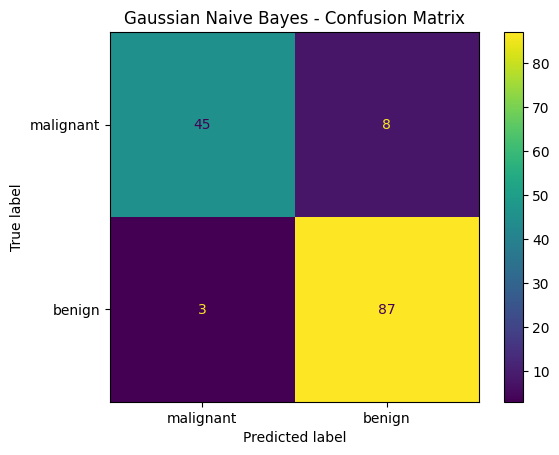


--- 10-Fold Cross-Validation (GaussianNB) ---
Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean CV accuracy: 0.9384711779448622
Standard deviation: 0.02750305414538902

--- Model Comparison Using 10-Fold CV ---
GaussianNB           mean=0.9385  std=0.0275
KNeighborsClassifier mean=0.9279  std=0.0201


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LogisticRegression   mean=0.9508  std=0.0302
SVC                  mean=0.9192  std=0.0352

Best model based on mean CV accuracy: LogisticRegression


In [2]:
# Ex 15.17 - Binary Classification with the Breast Cancer Dataset
# Complete Notebook (with Conclusion)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ------------------------------------------------------------
# Loading the Dataset
# ------------------------------------------------------------
breast_cancer = load_breast_cancer()
print("Dataset loaded successfully.")

# ------------------------------------------------------------
# Checking the Sample and Target Sizes
# ------------------------------------------------------------
print("\n--- Sample and Target Sizes ---")
print("Data shape (samples, features):", breast_cancer.data.shape)
print("Target shape (samples,):", breast_cancer.target.shape)
print("Target names:", breast_cancer.target_names)

# ------------------------------------------------------------
# Splitting the Data for Training and Testing
# ------------------------------------------------------------
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=11,
    stratify=y
)

# ------------------------------------------------------------
# Training and Testing Set Sizes
# ------------------------------------------------------------
print("\n--- Train/Test Set Sizes ---")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

# ------------------------------------------------------------
# Creating the Model (GaussianNB)
# ------------------------------------------------------------
nb = GaussianNB()
print("\nGaussianNB model created.")

# ------------------------------------------------------------
# Training the Model
# ------------------------------------------------------------
nb.fit(X_train, y_train)
print("Model training completed.")

# ------------------------------------------------------------
# Predicting
# ------------------------------------------------------------
y_pred = nb.predict(X_test)
print("\nFirst 20 predictions:", y_pred[:20])

# ------------------------------------------------------------
# Estimator Method score
# ------------------------------------------------------------
print("\n--- Accuracy Scores ---")
print("Training accuracy:", nb.score(X_train, y_train))
print("Testing accuracy :", nb.score(X_test, y_test))

# ------------------------------------------------------------
# Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(cm)

# ------------------------------------------------------------
# Classification Report
# ------------------------------------------------------------
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

# ------------------------------------------------------------
# Visualizing the Confusion Matrix
# ------------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(values_format='d')
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.show()

# ------------------------------------------------------------
# K-Fold Cross-Validation
# ------------------------------------------------------------
print("\n--- 10-Fold Cross-Validation (GaussianNB) ---")
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(
    estimator=nb,
    X=breast_cancer.data,
    y=breast_cancer.target,
    cv=kfold
)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# ------------------------------------------------------------
# Running Multiple Models to Find the Best One
# ------------------------------------------------------------
print("\n--- Model Comparison Using 10-Fold CV ---")

estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(
        solver='lbfgs', multi_class='ovr', max_iter=10000
    ),
    'SVC': SVC(gamma='scale')
}

results = {}

for name, estimator in estimators.items():
    cv_scores = cross_val_score(estimator, X, y, cv=kfold)
    results[name] = cv_scores
    print(f"{name:20s} mean={cv_scores.mean():.4f}  std={cv_scores.std():.4f}")

best_model = max(results, key=lambda k: results[k].mean())
print("\nBest model based on mean CV accuracy:", best_model)


In this exercise, the Breast Cancer dataset was used to perform binary
classification using a Gaussian Naive Bayes model. The model demonstrated
strong performance based on accuracy metrics, the confusion matrix, and
the classification report. K-Fold cross-validation further confirmed the
model’s ability to generalize to unseen data. A comparison of multiple
classifiers provided additional insight into overall model effectiveness.